## Load data

In [1]:
from LoadSplitData import Process
import numpy as np
np.random.seed(0)

Using TensorFlow backend.


In [2]:
data = Process()
data.split_data()

Images shape (24076, 80, 80, 3), label shape (24076,), ratio of authorized data 0.4503655092208008
X_train shape: (12639, 80, 80, 3)
12639 train samples
5418 valid samples
6019 test samples


## Train the model

In [3]:
from BuildModel import Model

In [4]:
FILE_PATH = r'C:\Users\dbsnail\ImageProject\models\ml' #_sgd.h5'
optimizers = ['sgd', 'adam', 'adamax']
batch_sizes = [40, 50, 60, 70, 80, 90]

model_dict = {}
for optimizer in optimizers:
    for batch_size in batch_sizes:
    
        file_path = FILE_PATH + '_' + str(batch_size) + '_' + optimizer + '.h5'
        model = Model(batch_size)
        model.build_model(data)
        model.train(data,optimizer)
        model.save(file_path)
        acc = model.evaluate(data)
        print("Optimizer: {}, batch_size: {}, test accuracy: {}".format(optimizer, batch_size, acc))
        if optimizer in model_dict.keys():
            model_dict[optimizer].append((batch_size, acc))
        else:
            model_dict[optimizer] = [(batch_size, acc)]           

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 80, 80, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 80, 80, 32)    9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 40, 40, 32)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 40, 40, 32)    0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

## Plot the accuracy

In [5]:
import pandas as pd
import json
with open('model.txt', 'w') as outfile:
    json.dumps(model_dict, outfile) 
model_acc = pd.DataFrame(model_dict)
model_acc

,adam,adamax,sgd
0,"(40, 99.6178762959)","(40, 99.6178763355)","(40, 97.7404873996)"
1,"(50, 99.285595602)","(50, 99.2689815624)","(50, 86.6755263218)"
2,"(60, 98.8702461953)","(60, 99.0197727898)","(60, 94.6502788684)"
3,"(70, 99.7009472329)","(70, 99.48496466)","(70, 93.7863444664)"
4,"(80, 99.4185075033)","(80, 99.3520512655)","(80, 90.0980251525)"
5,"(90, 98.9533165203)","(90, 98.7207209456)","(90, 83.7680718138)"


In [6]:
model_acc['batch_size'] = model_acc.adam.map(lambda x: x[0])
model_acc['adam_accuracy'] = model_acc.adam.map(lambda x: x[1])
model_acc['sgd_accuracy'] = model_acc.sgd.map(lambda x: x[1])
model_acc['adamax_accuracy'] = model_acc.adamax.map(lambda x: x[1])

In [7]:
model_acc

,adam,adamax,sgd,batch_size,adam_accuracy,sgd_accuracy,adamax_accuracy
0,"(40, 99.6178762959)","(40, 99.6178763355)","(40, 97.7404873996)",40,99.617876,97.740487,99.617876
1,"(50, 99.285595602)","(50, 99.2689815624)","(50, 86.6755263218)",50,99.285596,86.675526,99.268982
2,"(60, 98.8702461953)","(60, 99.0197727898)","(60, 94.6502788684)",60,98.870246,94.650279,99.019773
3,"(70, 99.7009472329)","(70, 99.48496466)","(70, 93.7863444664)",70,99.700947,93.786344,99.484965
4,"(80, 99.4185075033)","(80, 99.3520512655)","(80, 90.0980251525)",80,99.418508,90.098025,99.352051
5,"(90, 98.9533165203)","(90, 98.7207209456)","(90, 83.7680718138)",90,98.953317,83.768072,98.720721


In [8]:
import matplotlib.pyplot as plt

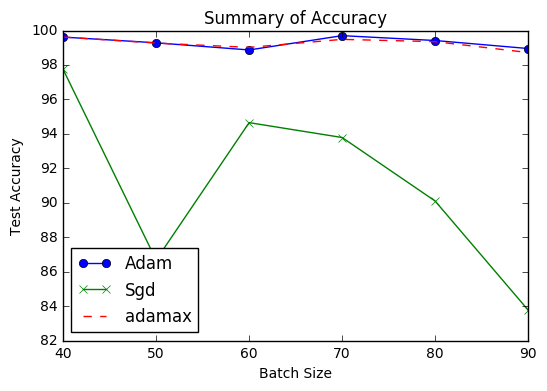

In [11]:
plt.figure()
plt.plot(model_acc.batch_size, model_acc.adam_accuracy, '-o', label = 'Adam')
plt.plot(model_acc.batch_size, model_acc.sgd_accuracy, '-x', label = 'Sgd')
plt.plot(model_acc.batch_size, model_acc.adamax_accuracy, '--r', label = 'adamax')
plt.xlabel("Batch Size")
plt.ylabel("Test Accuracy")
plt.title("Summary of Accuracy")
plt.legend(loc=3)
plt.savefig('accuracy.png')
plt.show()